#projet de régression linéaire



>



##*Réalisé par* :




> Oukessou Soufiane



> DS







##*Plan*


> Importation des bibliothèques


> Importation des données

> Description de base de données


> Préparation des données


> Régression lineaire simple entre maxO3 et T15


*   test de significativité du coefficient b1


> Régression lineaire multiple

*   Test de signification globale du modèle































###Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###Importation des données

In [2]:
data=pd.read_csv('ozone.txt',delimiter='\s+')
data.to_csv('ozone.csv')
data.head()

,maxO3,T9,T15,Ne9,Ne15,maxO3v
1,87,15.6,18.4,4,8,84
2,82,17.0,17.7,5,7,87
3,92,15.3,19.5,2,4,82
4,114,16.2,22.5,1,0,92
5,94,17.4,20.4,8,7,114


###description de base de données





1.   maxO3: Maximum de concentration d’ozone observé sur la journée .
2.   T9:Température observée à 9h du mation.
3. T15:Température observée à 15h.
4. Ne9: nébulosité à 9h (la quantite de nuages présents dans le ciel ).
5. Ne15: nébulosité à 15h.
6. maxO3v: Teneur maximum en ozone observée la veille (consentration maximmale d'ozone mesurée lors de la journée précédente)





In [3]:
data.describe()

,maxO3,T9,T15,Ne9,Ne15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,90.303571,18.360714,22.627679,4.928571,4.830357,90.571429
std,28.187225,3.122726,4.530859,2.594916,2.332259,28.276853
min,42.000000,11.300000,14.900000,0.000000,0.000000,42.000000
25%,70.750000,16.200000,19.275000,3.000000,3.000000,71.000000
50%,81.500000,17.800000,22.050000,6.000000,5.000000,82.500000
75%,106.000000,19.925000,25.400000,7.000000,7.000000,106.000000
max,166.000000,27.000000,35.500000,8.000000,8.000000,166.000000




>notre base de donées contient 112 observaions



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   maxO3   112 non-null    int64  
 1   T9      112 non-null    float64
 2   T15     112 non-null    float64
 3   Ne9     112 non-null    int64  
 4   Ne15    112 non-null    int64  
 5   maxO3v  112 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 6.1 KB


In [ ]:
data.isnull().sum()

maxO3     0
T9        0
T15       0
Ne9       0
Ne15      0
maxO3v    0
dtype: int64



> La base de données ne contient aucune valeur manquante.



###Préparation des données



{'whiskers': [<matplotlib.lines.Line2D at 0x7b9c908076a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9c90807be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9c908073a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9c90848160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9c90848400>],
 'means': []}

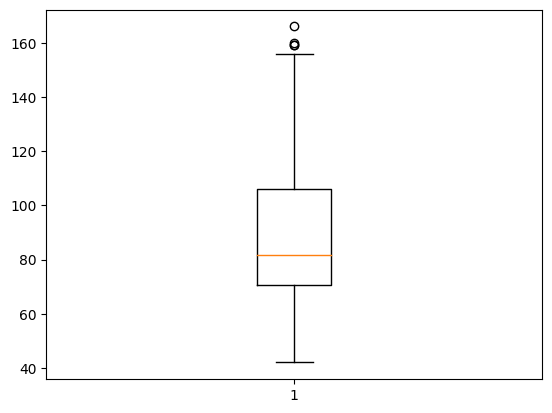

In [ ]:
plt.boxplot(data['maxO3'])



> la boite a moustache nous donne juste une presentation visuelle de valeurs aberrantes.





> mais on peut calculer le nbr de valeurs aberrantes selon le critére des qurtiles



In [3]:
#calculer les quartiles (Q1,Q3)
Q1=data['maxO3'].quantile(0.25)
Q3=data['maxO3'].quantile(0.75)
#calculer interquartile
IQR=Q3-Q1
#determiner la borne sup et la borne inf
born_sup=Q3+1.5*IQR
born_inf=Q1-1.5*IQR
valeurs_aberrantes=data[(data['maxO3']<born_inf)|(data['maxO3']>born_sup)]
valeurs_aberrantes.shape[0]

4

In [4]:
valeurs_aberrantes

,maxO3,T9,T15,Ne9,Ne15,maxO3v
54,159,24.0,26.5,2,7,153
56,160,25.0,31.1,0,5,149
79,166,19.8,30.8,4,1,131
80,159,25.0,35.5,1,1,166




> on a 4 valeurs aberrantes



In [6]:
data.head()

,maxO3,T9,T15,Ne9,Ne15,maxO3v
1,87,15.6,18.4,4,8,84
2,82,17.0,17.7,5,7,87
3,92,15.3,19.5,2,4,82
4,114,16.2,22.5,1,0,92
5,94,17.4,20.4,8,7,114


In [5]:
data_cleaned=data.drop(valeurs_aberrantes.index)

In [6]:
data_cleaned.describe()

,maxO3,T9,T15,Ne9,Ne15,maxO3v
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,87.685185,18.172222,22.318519,5.046296,4.879630,88.379630
std,25.102648,2.989916,4.268011,2.551834,2.306908,26.226803
min,42.000000,11.300000,14.900000,0.000000,0.000000,42.000000
25%,70.000000,16.175000,19.175000,3.000000,3.000000,70.750000
50%,81.000000,17.700000,21.850000,6.000000,5.000000,81.000000
75%,101.000000,19.750000,24.925000,7.000000,7.000000,101.000000
max,156.000000,27.000000,33.700000,8.000000,8.000000,160.000000




> Notre nouvelle base de données contient 108 observations.


###Regression lineaire simple entre maxO3 et T15

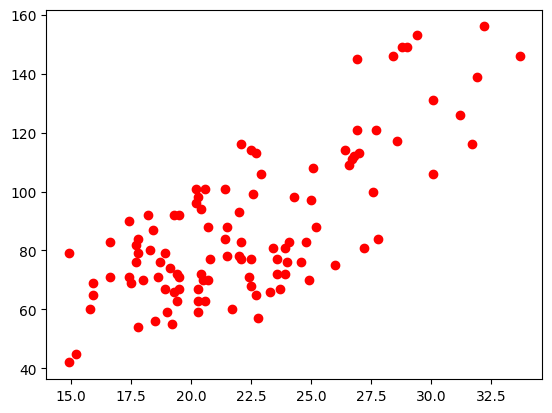

In [ ]:
X=data_cleaned['T15']
Y=data_cleaned['maxO3']
plt.scatter(X,Y,color='red',label='nuage de points')



> Selon cette observation visuelle des données, on constate qu'il existe une relation linéaire entre 'maxO3' et 'T15'




In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=data_cleaned['T15'].values.reshape(-1,1)
Y=data_cleaned['maxO3'].values
model=LinearRegression()
model.fit(X,Y)
b1=model.coef_
b0=model.intercept_
Y_pred=model.predict(X)
r2=r2_score(Y,Y_pred)

In [ ]:
b0

-10.029375146553647

In [ ]:
b1

array([4.37818309])

In [ ]:
r2

0.5541148079353468



> notre modele explique 55% d'information



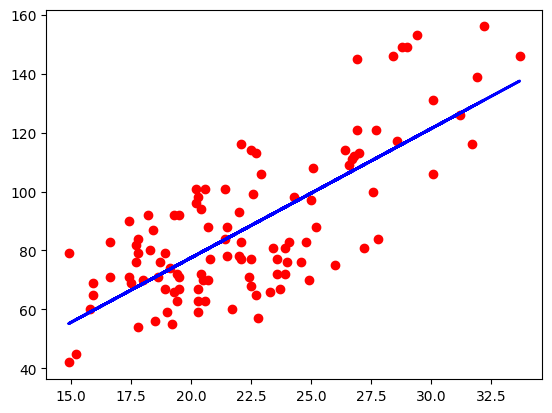

In [12]:
plt.scatter(X,Y,color='red',label='nuage de points')
plt.plot(X, Y_pred, color='blue', linewidth=2, label='Régression linéaire')

###test de significativité du coefficient b1


> H0: b1=0


> H1: b1!=0





In [13]:
from  scipy.stats import t
from sklearn.metrics import mean_squared_error
#calculer le statistique du test
MSE=mean_squared_error(Y,Y_pred)
Var_X=np.var(X)
n=len(Y)
SEb1=np.sqrt(MSE/(n*Var_X))
statistic_test=b1/SEb1
alpha=0.05
degree_liberte=n-2
t1_alpha=t.ppf(1-alpha/2,degree_liberte)

In [ ]:
if statistic_test>t1_alpha :
  print("on rejette H0 c'est à dire la regression est significative")
else:
  print("on accepte H0 la regression n'est pas siginificative ")

on rejette H0 c'est à dire la regression est significative


donc la regression est  siginificatif

###Rgression lineaire multiple

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
XM=data_cleaned[['T9','T15','Ne9','Ne15','maxO3v']]
YM=data_cleaned['maxO3']
model=LinearRegression()
model.fit(XM,YM)
b=model.coef_
b0=model.intercept_
YM_pred=model.predict(XM)
r2=r2_score(YM,YM_pred)

In [ ]:
b1=b[0]
b2=b[1]
b3=b[2]
b4=b[3]
b5=b[4]

In [ ]:
b0,b1,b2,b3,b4,b5

(19.09284821458138,
 0.45917281870942833,
 2.0587169708977267,
 -3.1206418711598487,
 0.06644725562102693,
 0.3363227394703032)

In [ ]:
r2

0.7013469498763538



> Le modéle explique 70.13% d'information



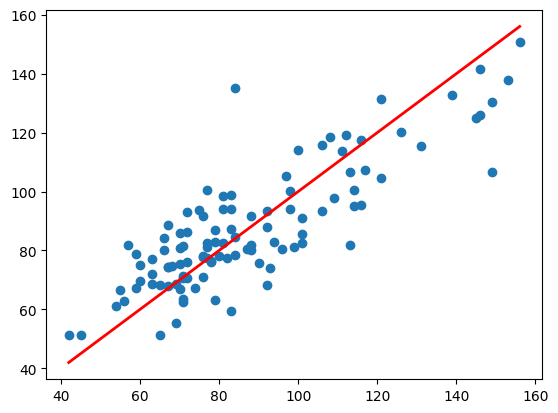

In [ ]:
plt.scatter(YM,YM_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', lw=2)

###Test de signification globale du modèle



>H0 : b1=...=b5=0


> H1 : il existe j∊{1,…,5} tel que βj≠0




In [ ]:
from  scipy.stats import f
p=XM.shape[1]
n=len(YM)
SCE=np.sum((YM-YM_pred)**2)
SCR=np.sum((YM_pred-np.mean(YM))**2)
test_fisher=(SCE/(p-1))/(SCR/(n-p))
p_value = 1 - f.cdf(test_fisher, p-1, n-p)
alpha=0.05


In [16]:
if p_value < alpha:
    print("On rejette H0 le modele est significative ")
else:
    print("on accepte H0 le modele n'est pas significatif")

On rejette H0 le modele est significative 


##Selection des variables

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X=data_cleaned[['T9','T15','Ne9','Ne15','maxO3v']]
Y=data_cleaned['maxO3']
selector=SelectKBest(score_func=f_classif,k=2)
selector.fit(X,Y)
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print(selected_features)

Index(['T9', 'T15'], dtype='object')


### test de model maxO3=b0+b1T9+b2T15

In [16]:
from sklearn.linear_model import LinearRegression
from scipy.stats import f
X=data_cleaned[['T9','T15']]
Y=data_cleaned['maxO3']
model=LinearRegression()
model.fit(X,Y)
Y_pred=model.predict(X)
p=X.shape[1]
n=len(Y)
SCE=np.sum((Y-Y_pred)**2)
SCR=np.sum((Y_pred-np.mean(Y))**2)
test_fisher=(SCE/(p-1))/(SCR/(n-p))
p_value = 1 - f.cdf(test_fisher, p-1, n-p)
alpha=0.05
if p_value < alpha:
    print("On rejette H0 le modele est significative ")
else:
    print("on accepte H0 le modele n'est pas significatif")

On rejette H0 le modele est significative 
